# Jupyter Notebook

This is a Jupyter Notebook, which is a basically just a super fancy Python shell.

You may have "cells" that can either be text (like this one) or executable Python code. Notebooks are really nice because they allow you to rapidly develop Python code by writing small bits of code, testing their output, and moving on to the next bit; this interactive nature of the notebook is a huge plus to professional Python developers. 

It's also nice, because it's really easy to share your code with others and surround it with text to tell a story! 

# Colaboratory
Colaboratory is a service provided by Google to take a Jupyter Notebook (a standard formay of a `.ipynb` file) and let users edit/run the code in the notebook for free! 

This notebook is write-protected so you are not able to edit the  notebook that the whole class will look at, but you are able to open up the notebook in "playground mode" which lets you make edits to a temporary copy of the notebook. If you want to save the changes you made to this notebook, you will have to follow the instructions when you try to save to copy the notebook to your Google Drive. 

# Setup
Make sure you run the following cell(s) before trying to run any the following cells. You do not need to understand what they are doing, it's just a way to make sure there is a file we want to use stored on the computer running this notebook.


In [0]:
import math

import imageio
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

%matplotlib inline

We start by loading in the MNIST dataset of hand-written digits with their labels. Many machine learning algorithms require the inputs be scaled to appropriate values, so we first change the range of the pixel values to be between 0 and 1

In [0]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

Then, instead of using `train_test_split` like we would do in most situations, we separate the train data as the first 60,000 rows and the test as the remaining rows. This is generally not a good idea in practice, but this dataset is provided by the author with those rows specifically to be used as the test set.

In [0]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
print(X_train.shape)

(60000, 784)


Notice that the data is shaped such that each image is a row and the image has been "unrolled" so it appears as one long sequence of pixels. We can use `reshape` to plot what the image looks like! 

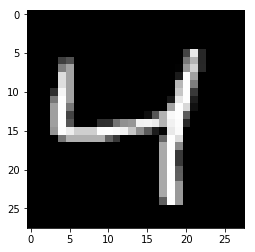

In [0]:
plt.imshow(X[2].reshape((28, 28)), cmap=plt.cm.gray)

We then go ahead to import and create a neural network using `sklearn`. The most important parameter is the `hidden_layer_sizes` which specifies the number of hidden layers and the number of nodes that appear at each layer respectively. 

The remaining parameters are not as important and are there to keep the details of the output manageable.

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), 
                    max_iter=10, verbose=10, random_state=1)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

We can then train the model on the training set and then look at what it's training and test accuracy are. Some things to notice
* While runnning `fit`, it prints out lines starting with "Iteration:". This is signifying each phase of updating the network weights based on the mis-classified examples. The number after called the "loss" is a measurement of how much error there is (but slightly different than accuracy).
* With this architecture, we get really high training and test accuracy! 

In [0]:
mlp.fit(X_train, y_train)
print('Training score', mlp.score(X_train, y_train))
print('Testing score', mlp.score(X_test, y_test))

Iteration 1, loss = 0.52090613
Iteration 2, loss = 0.25006049
Iteration 3, loss = 0.19728192
Iteration 4, loss = 0.16435969
Iteration 5, loss = 0.14179291
Iteration 6, loss = 0.12474275
Iteration 7, loss = 0.11050647
Iteration 8, loss = 0.09964098
Iteration 9, loss = 0.09138456
Iteration 10, loss = 0.08368557


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training score 0.9793833333333334
Testing score 0.968


These networks are very sensitive to the hyper-parameters we use (parameters that specify the algorithm or model we are using). If you go ahead and add more layers and shorten the number of nodes at each layer, you get a pretty different accuracy! 

This is one example of the complexities of neural networks! It's hard to predict how changing the architecture will affect the performance of the model. This leads us to our next point of trying to find the best setting of these hyper-parameters.

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10), 
                    max_iter=10, verbose=10, random_state=1)
mlp.fit(X_train, y_train)
print('Training score', mlp.score(X_train, y_train))
print('Testing score', mlp.score(X_test, y_test))

Iteration 1, loss = 1.45255343
Iteration 2, loss = 0.57299610
Iteration 3, loss = 0.38572560
Iteration 4, loss = 0.32854750
Iteration 5, loss = 0.30268236
Iteration 6, loss = 0.28441232
Iteration 7, loss = 0.27175338
Iteration 8, loss = 0.26216631
Iteration 9, loss = 0.25362123
Iteration 10, loss = 0.24813976


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training score 0.9289166666666666
Testing score 0.9192


# Hyperparameter Tuning
Since there is no good way of telling "what the best settings are", the only thing really left is to try them all and see which one is best.

For this example, we will try a few different network architectures as well as modifying a new parameter called the "learning rate"; this parameter essentially controls how much we update the weights by on each iteration.

The nested loop below trying every possible setting is a very common piece of code for machine learning where we have to try all combinations of the hyper-parameters.

In [0]:
learning_rates = [0.001, 0.01, 0.5]
sizes = [(10,), (50,), (10, 10, 10, 10),]
for learning_rate in learning_rates:
    for size in sizes:
      print(f'Learning Rate {learning_rate}, Size {size}')
      mlp = MLPClassifier(hidden_layer_sizes=size, max_iter=10,
                          random_state=1, learning_rate_init=learning_rate)
      mlp.fit(X_train, y_train)
      print("    Training set score: %f" % mlp.score(X_train, y_train))
      print("    Test set score: %f" % mlp.score(X_test, y_test))

Learning Rate 0.001, Size (10,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.935850
    Test set score: 0.932600
Learning Rate 0.001, Size (50,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.979383
    Test set score: 0.968000
Learning Rate 0.001, Size (10, 10, 10, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.928017
    Test set score: 0.921700
Learning Rate 0.01, Size (10,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.922650
    Test set score: 0.915000
Learning Rate 0.01, Size (50,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.980800
    Test set score: 0.965900
Learning Rate 0.01, Size (10, 10, 10, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.918150
    Test set score: 0.909000
Learning Rate 0.5, Size (10,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.102183
    Test set score: 0.101000
Learning Rate 0.5, Size (50,)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.150467
    Test set score: 0.152400
Learning Rate 0.5, Size (10, 10, 10, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


    Training set score: 0.112367
    Test set score: 0.113500


How would we choose which hyper-parameters to use?

*   Should we use the ones that maximize the training accuracy? Not necessarily since this might just select the most complicated model that is most likely to overfit to the data.
*   Should we use the ones that maximize the test accuracy? This is a better idea since we we won't necessarily pick a model that overfit to the training set. However, this is not a good idea since it ruins the point of a test set! Why did we want the test set? We wanted a test set to let use give a good estimate of how our model will do in the future. If we picked a model that maximized the test-accuracy, this accuracy is no longer a good estimate of how it will do on future data since we chose the model that did best on that specific dataset.

So to make this work, we generally split the training set into another set called the "validation" or "dev" set that we use to pick the hyper-parameter settings. Then we can leave the test set untouched until the very end of our project.



# Unsupervised Learning
All of the machine learning models we have seen before fall under the category of "supervised learning". This means that in order to train the model, we needed to provide it explicit labels for our training data so it could make predictions. Frequently, we have data without labels which would not work in this setting. The ways to fix this are:

*   Pay someone to label your data. This can be time consuming and prone to errors if your problem is too difficult! 
*  Use a machine learning model that is able to find trends in the data without needing labels. These types of models fall in a category called "unsupervised learning".

One such unsupervised learning method is finding "blobs" in an image. Below, we show code to use a library called "scikit-image" (`skimage`) to load in a picture from the Hubble telescope and trains a model to find the galaxies in the picture. 

We did not talk about the specifics of how the model works, but it does something to infer where it is likely a galaxy will be and where it is not. Notice we never instructed it what is/isn't a galaxy. The model knows how to find areas that look brighter than others and will infer that for us.



In [0]:
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

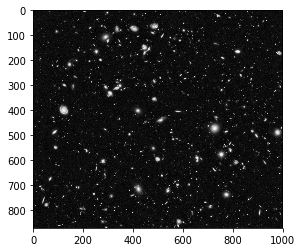

In [0]:
image = data.hubble_deep_field()
image_gray = rgb2gray(image)
plt.imshow(image_gray, cmap=plt.cm.gray)

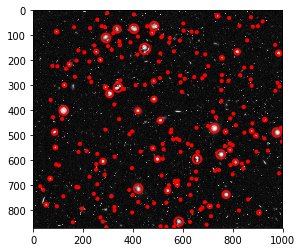

In [0]:
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)
fig, ax = plt.subplots(1)
ax.imshow(image_gray, cmap=plt.cm.gray)
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)